### [Scikit-Learn Classifier Comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [25]:
import torch

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import sklearn.metrics as measure

DATA_train_PATH = "../../data/embeddings/audio_trn_embeddings.pt"
DATA_val_PATH = "../../data/embeddings/audio_val_embeddings.pt"


classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "RBF SVM": SVC(gamma=2, C=1),
    "Gaussian Process": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5,
                                            n_estimators=10,
                                            max_features=1),
    "Neural Net": MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis(),
}

In [26]:
data_train = torch.load(DATA_train_PATH)
data_val = torch.load(DATA_val_PATH)

In [27]:
data_val.keys()

dict_keys(['embeddings', 'y_val', 'filenames'])

In [28]:
data['filenames'][1]

'/Users/shraymathur/MyFolders/UT/Research/data/fewshot_trn'

In [30]:
# Import embeddings and prepare x_trn, x_val, y_trn, y_val.
# data = torch.load(DATA_PATH)

# x_trn, y_trn = data["x_trn"], data["y_trn"]
# x_val, y_val = data["x_val"], data["y_val"]

x_trn, y_trn = data_train["embeddings"], data_train["y_trn"]
x_val, y_val = data_val["embeddings"], data_val["y_val"]

In [46]:
import pandas as pd
import numpy as np

In [63]:
x_trn_pd = pd.DataFrame()
# pd.DataFrame(x_trn.numpy())
for inst in x_trn:
    px = pd.DataFrame(inst.numpy()).T
    x_trn_pd = pd.concat([x_trn_pd, px])

In [65]:
x_val_pd = pd.DataFrame()
# pd.DataFrame(x_trn.numpy())
for inst in x_val:
    px = pd.DataFrame(inst.numpy()).T
    x_val_pd = pd.concat([x_val_pd, px])

In [66]:
x_val_pd.shape

(108, 768)

In [60]:
empty_pd = pd.DataFrame()
px = pd.DataFrame(x_trn[0].numpy()).T

In [61]:
pd.concat([empty_pd, px])

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.841881,0.319253,0.611672,-3.139318,-0.680591,-0.165151,0.197873,-0.594798,0.360287,-0.280293,...,0.335202,-0.559755,-1.646207,1.047202,0.035336,-0.436027,-0.652273,-0.471381,0.583881,-0.195573


In [62]:
empty_pd

""


In [58]:
np.array([1,768])

(2,)

In [67]:
def classify(x_trn, y_trn, x_val, y_val, name, clf):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(x_trn, y_trn)
    pred_val = clf.predict(x_val)
    accuracy = measure.accuracy_score(y_val, pred_val)
    print(f"{name}: {accuracy:.3f}")

    disp = measure.ConfusionMatrixDisplay.from_predictions(
            y_val,
            pred_val,
            display_labels=["Dance (0.18)", "Couple Romance (0.32)",
                            "Heartbreak Romance (0.27)", "Memes (0.09)",
                            "Pranks (0.14)"],
            normalize="true",
            xticks_rotation=45
            )

    plt.show()


Nearest Neighbors: 0.444


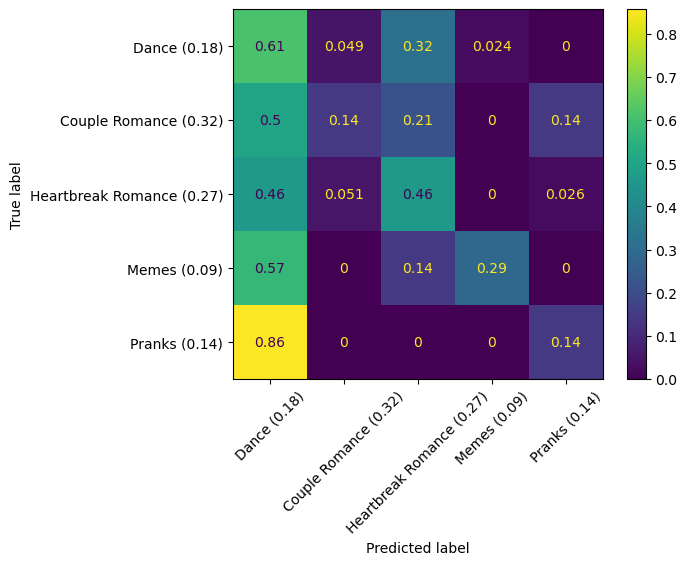

Linear SVM: 0.435


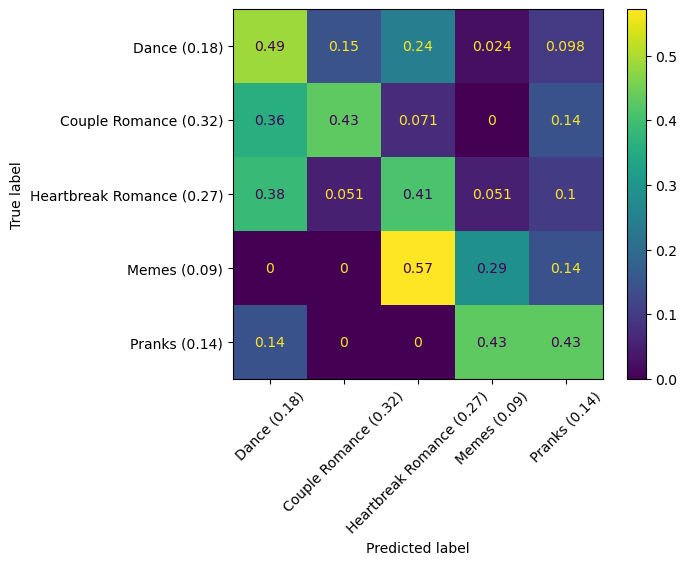

RBF SVM: 0.380


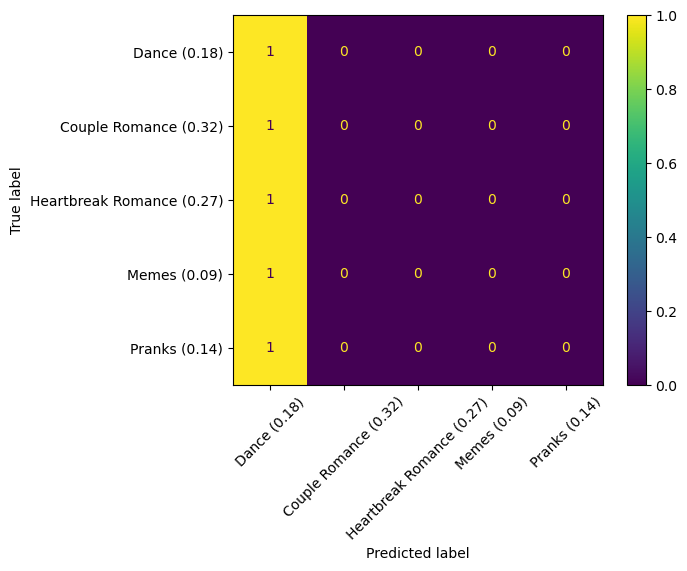

/Users/shraymathur/opt/anaconda3/envs/mmaudio/lib/python3.8/site-packages/sklearn/gaussian_process/_gpc.py:477: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Gaussian Process: 0.463


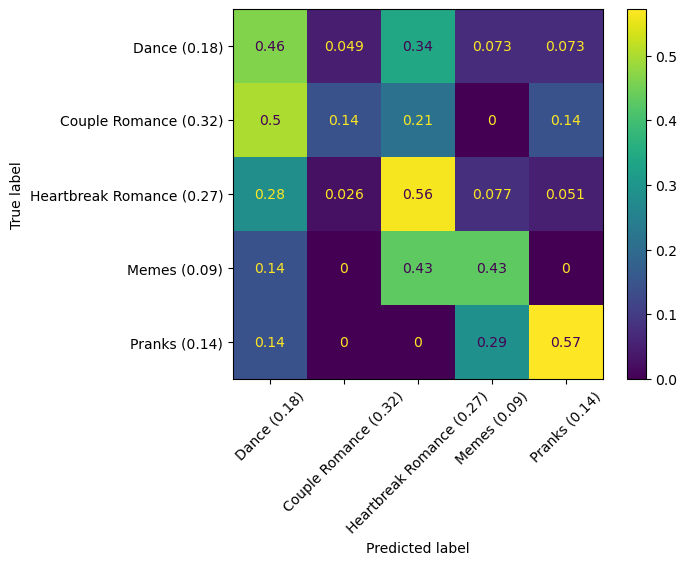

Decision Tree: 0.306


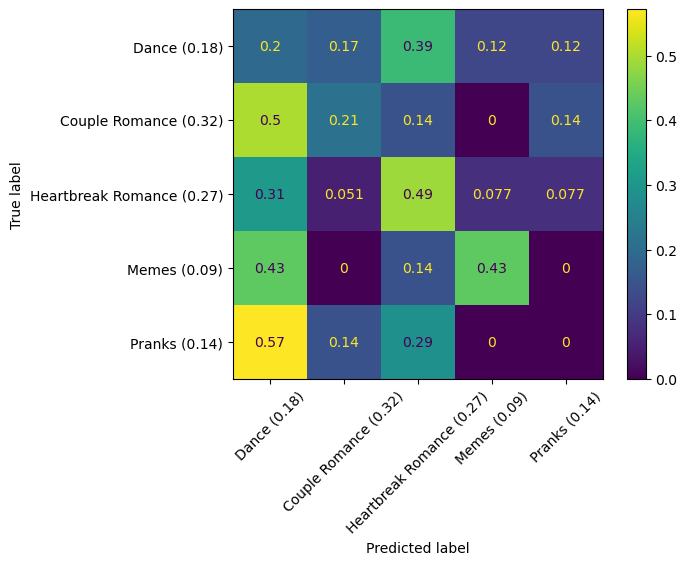

Random Forest: 0.389


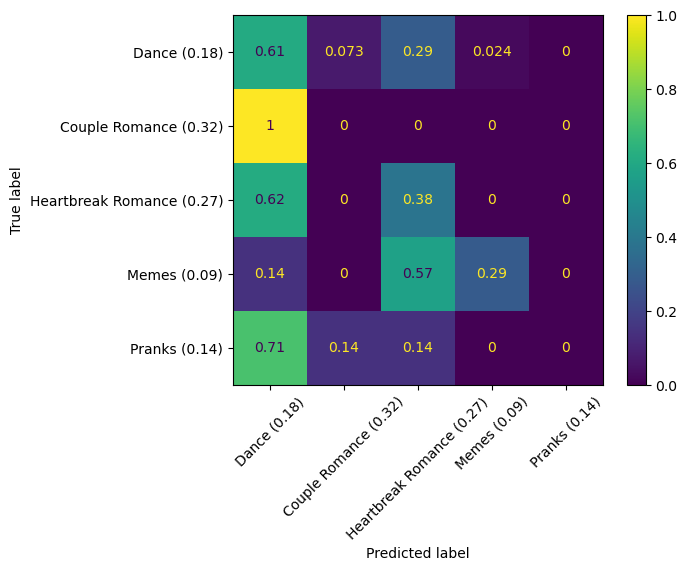

Neural Net: 0.463


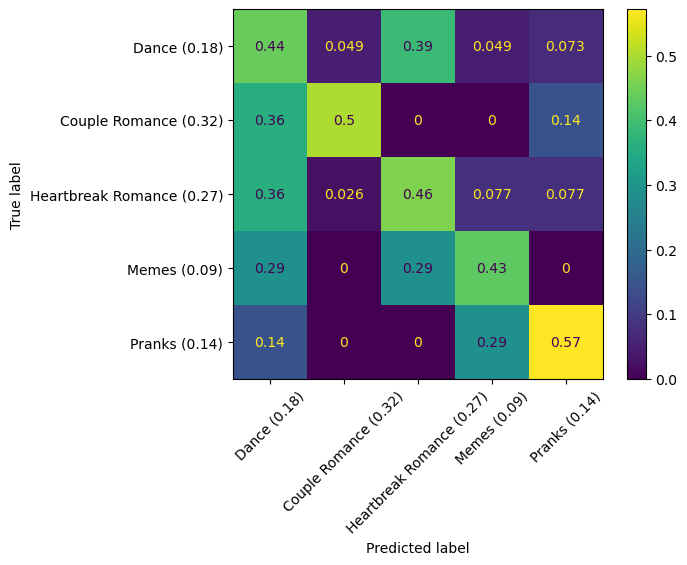

AdaBoost: 0.250


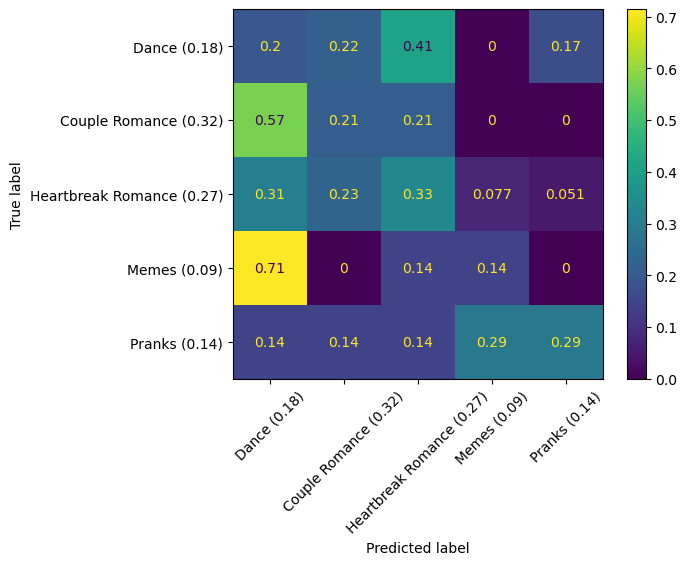

Naive Bayes: 0.481


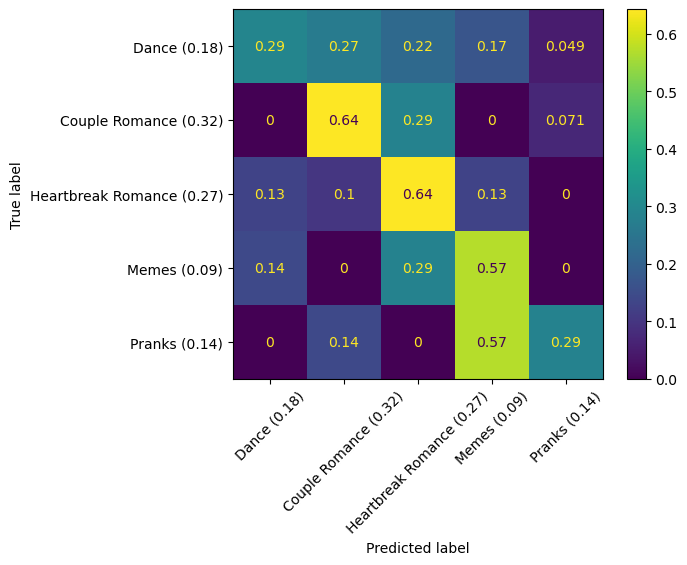

QDA: 0.213


/Users/shraymathur/opt/anaconda3/envs/mmaudio/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


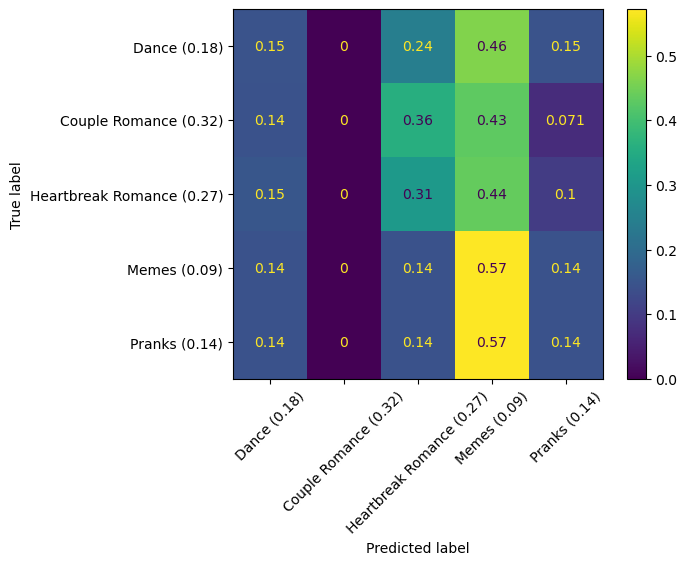

In [68]:
"""Iterate over classifiers."""
for name, clf in classifiers.items():
    classify(x_trn_pd, y_trn, x_val_pd, y_val, name, clf)